In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [39]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32,
)

Found 7308 files belonging to 4 classes.


In [40]:
class_names = dataset.class_names
print(class_names)

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']


In [41]:
len(dataset)

229

In [42]:
# 0,1,2,3...9 classes (10 classes)
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].shape)

(32, 256, 256, 3)
[1 3 0 0 2 3 2 3 1 2 2 3 3 3 3 2 2 1 0 2 2 1 0 0 3 2 2 2 0 0 3 1]
(256, 256, 3)


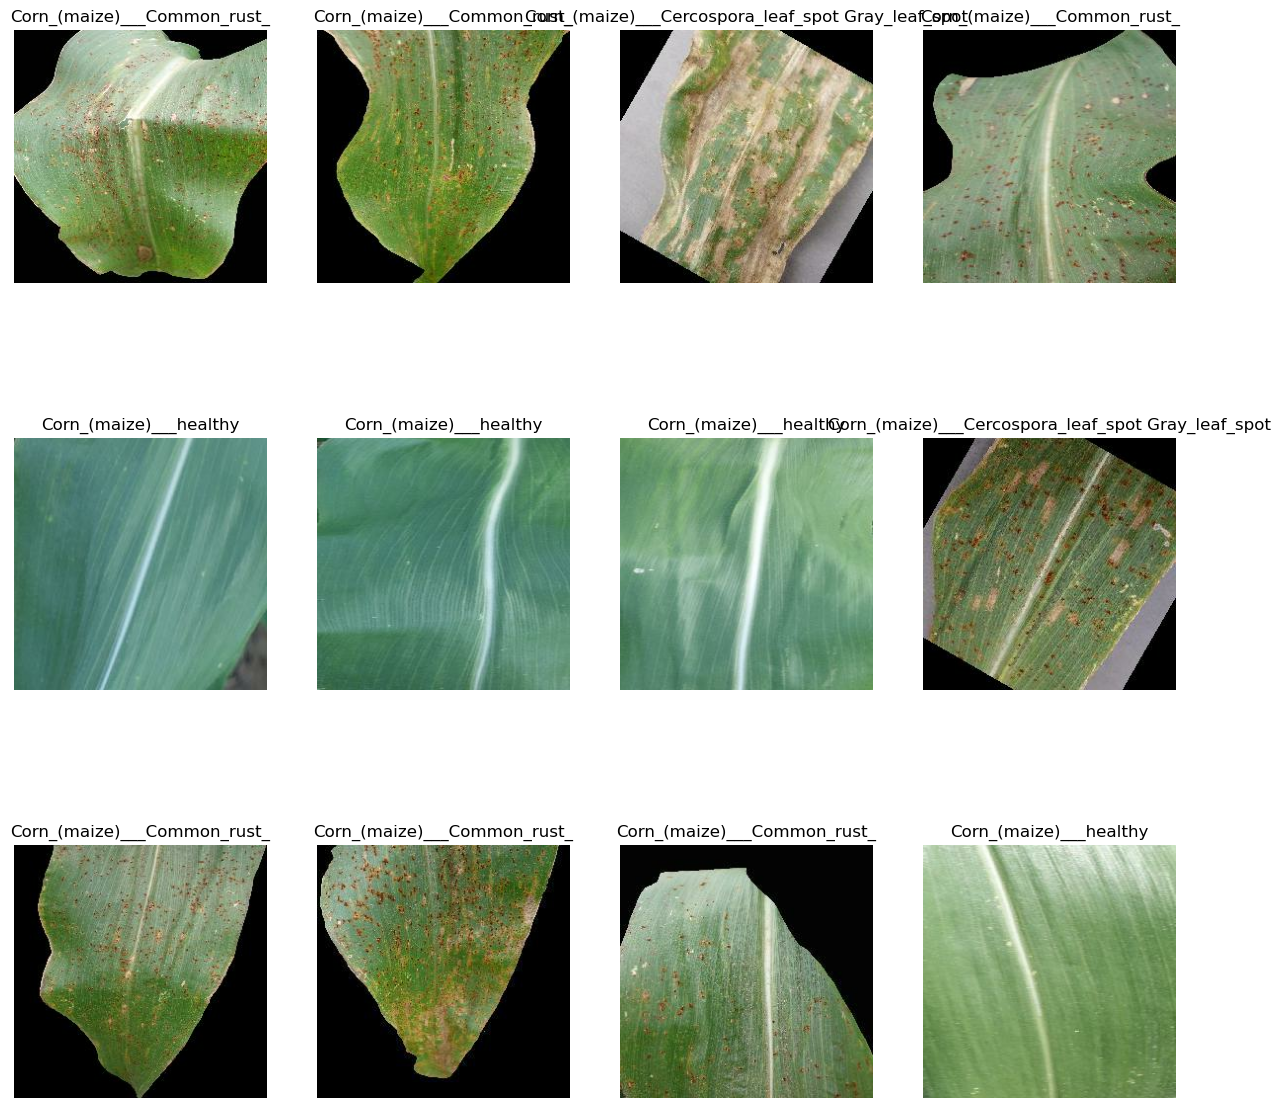

In [43]:
#visualize image
plt.figure(figsize=(15,15)) #to fix images size
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
#80% ==> training 
#20% ==> 10% validation, 10% test

In [44]:
def dataset_partition(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [45]:
train_ds, val_ds, test_ds = dataset_partition(dataset)

In [46]:
print(len(train_ds),
len(val_ds),
len(test_ds))

183 22 24


In [47]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [48]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(256, 256),
    tf.keras.layers.Rescaling(1.0/255)
])

In [49]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [50]:
input_shape = (32, 256, 256, 3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])
model.build(input_shape=input_shape)

In [51]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_6 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [52]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [53]:
history = model.fit(train_ds, 
          validation_data=val_ds, 
          epochs=50,
          batch_size=32,
          verbose=1)

Epoch 1/50
183/183 [==============================] - 39s 153ms/step - loss: 0.5505 - accuracy: 0.7466 - val_loss: 0.3163 - val_accuracy: 0.8452
Epoch 2/50
183/183 [==============================] - 26s 143ms/step - loss: 0.2469 - accuracy: 0.9042 - val_loss: 0.2485 - val_accuracy: 0.8949
Epoch 3/50
183/183 [==============================] - 25s 135ms/step - loss: 0.2013 - accuracy: 0.9236 - val_loss: 0.3383 - val_accuracy: 0.8651
Epoch 4/50
183/183 [==============================] - 22s 121ms/step - loss: 0.1653 - accuracy: 0.9342 - val_loss: 0.2204 - val_accuracy: 0.8935
Epoch 5/50
183/183 [==============================] - 23s 126ms/step - loss: 0.1485 - accuracy: 0.9429 - val_loss: 0.2063 - val_accuracy: 0.8906
Epoch 6/50
183/183 [==============================] - 23s 123ms/step - loss: 0.1374 - accuracy: 0.9460 - val_loss: 0.2035 - val_accuracy: 0.9006
Epoch 7/50
183/183 [==============================] - 24s 130ms/step - loss: 0.1230 - accuracy: 0.9503 - val_loss: 0.2131 - val_ac

In [54]:
scores = model.evaluate(test_ds)

24/24 [==============================] - 3s 20ms/step - loss: 0.0739 - accuracy: 0.9714


In [55]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 183}

In [56]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [57]:
history.history['accuracy']

[0.7465729713439941,
 0.9042152166366577,
 0.9235777854919434,
 0.9342014789581299,
 0.942940354347229,
 0.9460246562957764,
 0.9503084421157837,
 0.9557916522026062,
 0.9549348950386047,
 0.9569910764694214,
 0.9506511092185974,
 0.9631596803665161,
 0.9547635316848755,
 0.9623029232025146,
 0.9650445580482483,
 0.9527073502540588,
 0.9633310437202454,
 0.960246741771698,
 0.9564770460128784,
 0.9633310437202454,
 0.9718985557556152,
 0.9725839495658875,
 0.9722412824630737,
 0.9684715270996094,
 0.9742974638938904,
 0.9746401906013489,
 0.9737834334373474,
 0.9715558886528015,
 0.9766963720321655,
 0.9748114943504333,
 0.9753255844116211,
 0.9734407067298889,
 0.9773817658424377,
 0.9785812497138977,
 0.9785812497138977,
 0.9724125862121582,
 0.9787525534629822,
 0.9739547371864319,
 0.9715558886528015,
 0.9820082187652588,
 0.9766963720321655,
 0.9828649759292603,
 0.9825222492218018,
 0.9676148295402527,
 0.9765250086784363,
 0.9808087944984436,
 0.9799520373344421,
 0.979609310626

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

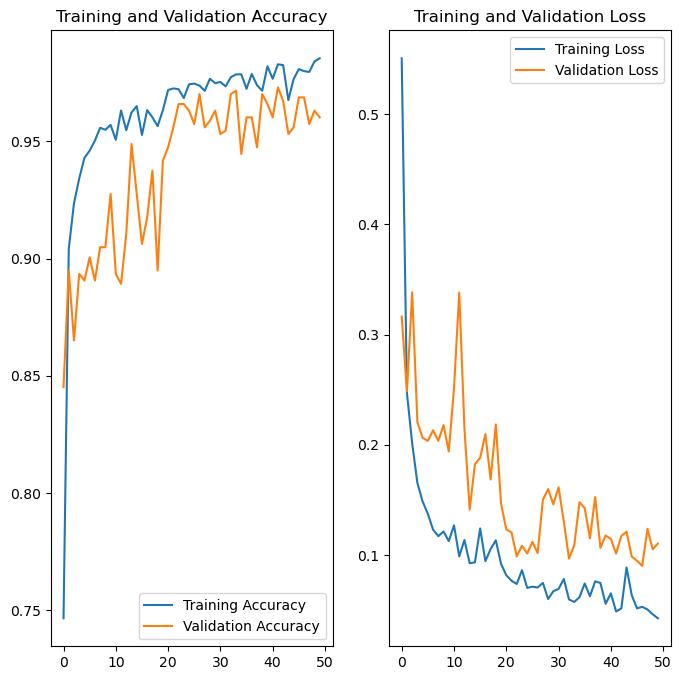

In [59]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual lable:  Corn_(maize)___Northern_Leaf_Blight
1/1 [==============================] - 0s 88ms/step
Predicted lable:  Corn_(maize)___Northern_Leaf_Blight


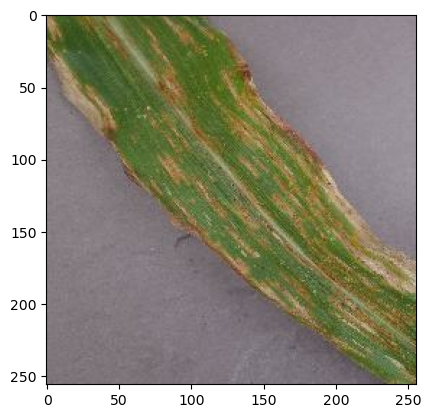

In [60]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
    first_image = (image_batch[0].numpy().astype("uint8"))
    first_lable = label_batch[0].numpy()

    print("First image to predict")

    plt.imshow(first_image)
    print("Actual lable: ", class_names[first_lable])
    #print(class_names[first_lable])

    batch_prediction = model.predict(image_batch)
    print("Predicted lable: ", class_names[np.argmax(batch_prediction[0])])

In [61]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 12ms/step


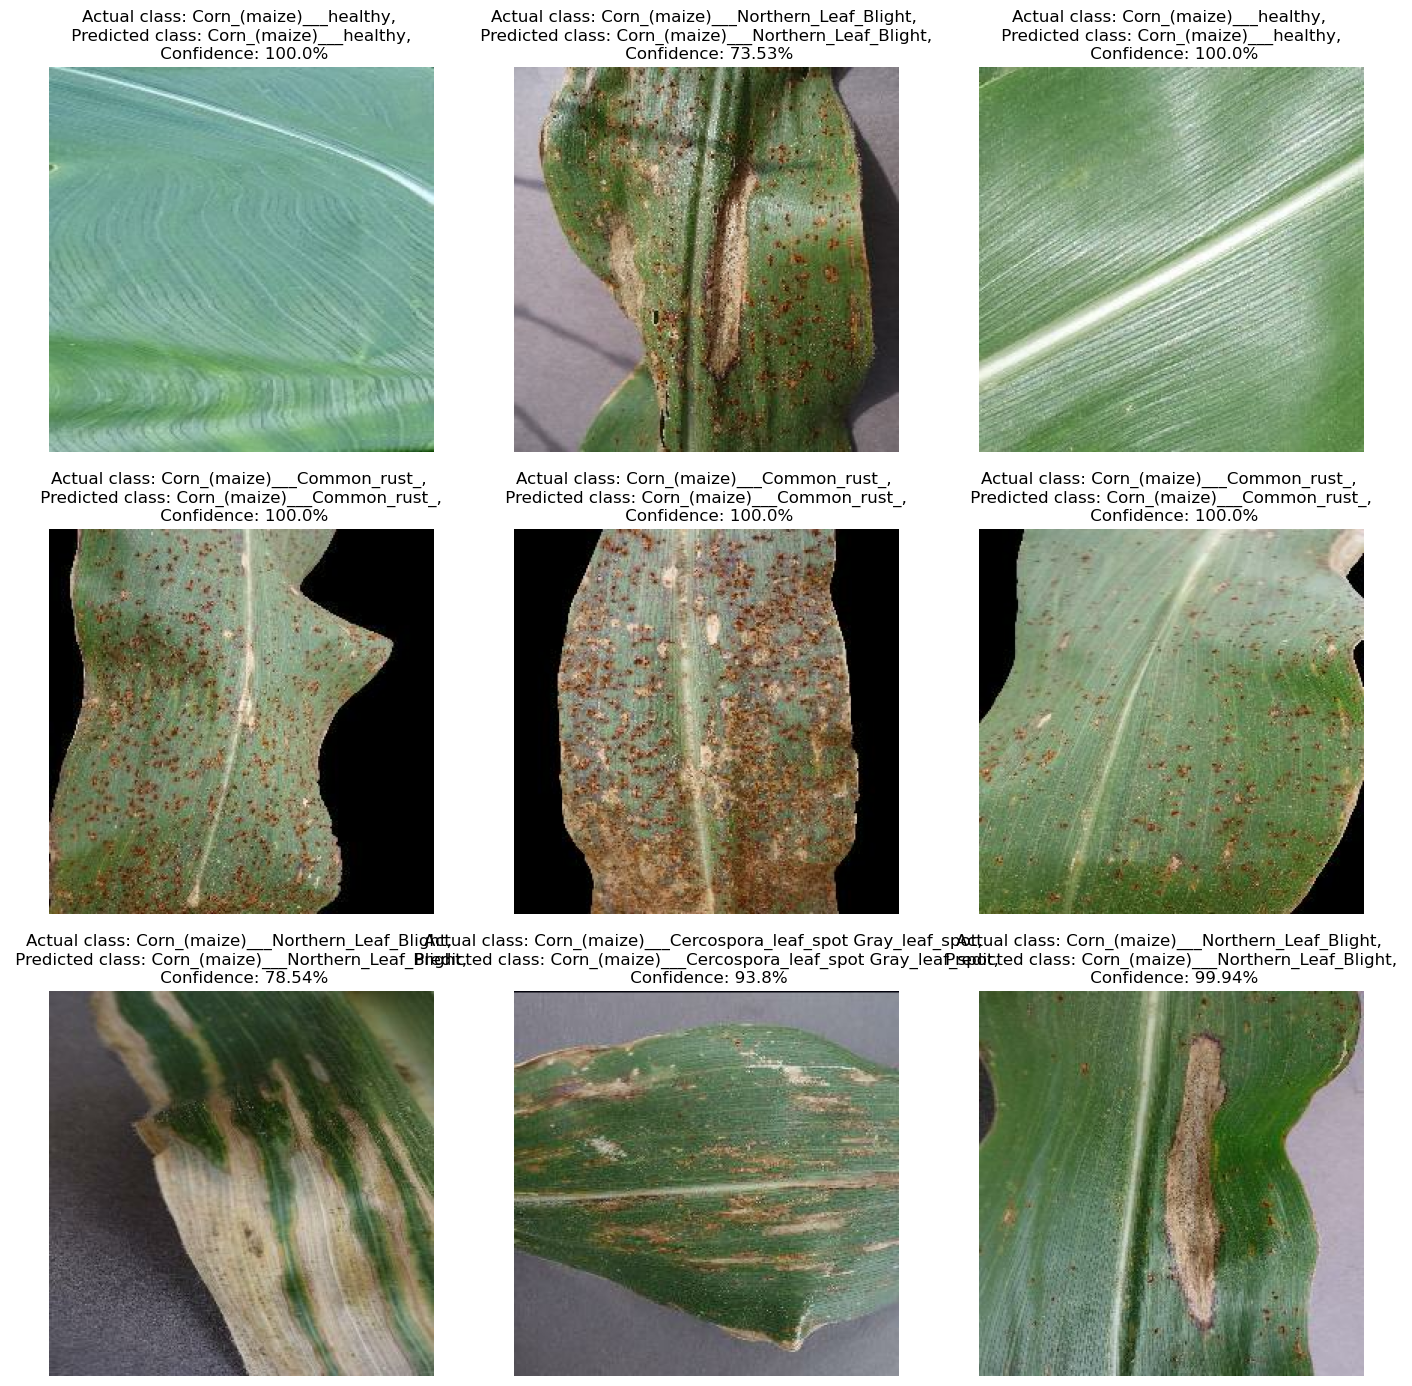

In [63]:
plt.figure(figsize=(17,17))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]


        plt.title(f"Actual class: {actual_class}, \n Predicted class: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis("off")

In [64]:
model_version = "Corn_Training_v1"
model.save(f"../Models/{model_version}")



INFO:tensorflow:Assets written to: ../Models/Corn_Training_v1\assets


INFO:tensorflow:Assets written to: ../Models/Corn_Training_v1\assets
